In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

В этой задаче

In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [ ]:
print(f'Count of unique users: {ratings.user_id.nunique()}')
print(f'Count of unique books: {ratings.book_id.nunique()}')

Count of unique users: 53424
Count of unique books: 10000


In [ ]:
ratings[ratings.user_id==258]

,user_id,book_id,rating
5118,258,8,5
5119,258,10,2
5120,258,115,5
5121,258,4,4
5122,258,101,3
...,...,...,...
603207,258,816,3
603208,258,515,5
603210,258,3216,2
603211,258,2055,4


<AxesSubplot: xlabel='rating', ylabel='Count'>

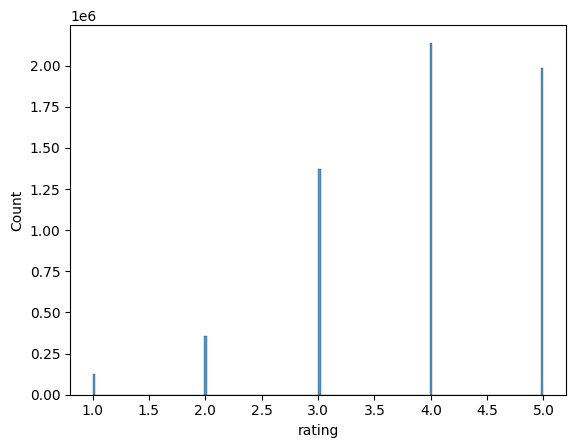

In [ ]:
sns.histplot(ratings.rating)

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df, train_y, test_y = train_test_split(ratings[['user_id', 'book_id']], ratings.rating, train_size=0.8)

In [ ]:
books = pd.read_csv('books.csv')

In [ ]:
books.head(10)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,eng,4.26,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,The Hobbit,en-US,4.25,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,The Catcher in the Rye,eng,3.79,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,"Angels & Demons (Robert Langdon, #1)",en-CA,3.85,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,Pride and Prejudice,eng,4.24,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


In [ ]:
list(books)

['book_id',
 'goodreads_book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn',
 'isbn13',
 'authors',
 'original_publication_year',
 'original_title',
 'title',
 'language_code',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5',
 'image_url',
 'small_image_url']

In [ ]:
genres_df = pd.read_json('goodreads_book_genres_initial.json', lines=True)

In [ ]:
genres_df = genres_df[genres_df.book_id.isin(books.goodreads_book_id)]

In [ ]:
genres_df.columns = ['book_id', 'genres_dict']

In [ ]:
genres_df.head(5)

,book_id,genres_dict
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
15,89375,"{'non-fiction': 534, 'history, historical fict..."
583,54270,"{'history, historical fiction, biography': 108..."
807,38568,"{'fantasy, paranormal': 1907, 'romance': 1598,..."
816,38562,"{'fantasy, paranormal': 1002, 'romance': 896, ..."


In [ ]:
all_genres = set()
for dict_genre in genres_df.genres_dict:
    for elem in list(dict_genre.keys()):
        all_genres.add(elem)

all_genres

{'children',
 'comics, graphic',
 'fantasy, paranormal',
 'fiction',
 'history, historical fiction, biography',
 'mystery, thriller, crime',
 'non-fiction',
 'poetry',
 'romance',
 'young-adult'}

In [ ]:
for genre in all_genres:
    genres_df[genre] = 0

In [ ]:
def simple_one_hot(genre_dict, genre):
    if genre in genre_dict:
        return 1
    return 0

In [ ]:
for genre in all_genres:
    genres_df[genre] = genres_df.apply(lambda df: simple_one_hot(df['genres_dict'], genre), axis=1)

In [ ]:
genres_df

,book_id,genres_dict,"comics, graphic",poetry,"mystery, thriller, crime","history, historical fiction, biography",non-fiction,"fantasy, paranormal",children,fiction,young-adult,romance
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri...",0,0,1,0,0,0,0,1,0,1
15,89375,"{'non-fiction': 534, 'history, historical fict...",1,0,0,1,1,0,0,1,0,0
583,54270,"{'history, historical fiction, biography': 108...",1,0,0,1,1,0,0,0,0,0
807,38568,"{'fantasy, paranormal': 1907, 'romance': 1598,...",0,0,0,0,0,1,0,1,0,1
816,38562,"{'fantasy, paranormal': 1002, 'romance': 896, ...",0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2359417,7663,"{'fiction': 409, 'mystery, thriller, crime': 4...",0,0,1,0,1,0,0,1,0,0
2359672,6280379,"{'fiction': 1254, 'history, historical fiction...",0,0,0,1,0,1,0,1,0,0
2360252,6871646,"{'children': 1036, 'fiction': 57, 'fantasy, pa...",0,1,0,0,0,1,1,1,0,0
2360258,7657484,"{'comics, graphic': 1535, 'fiction': 70, 'fant...",1,0,0,1,0,1,0,1,1,0


In [ ]:
train_df = train_df.merge(books[['book_id', 'goodreads_book_id']], left_on='book_id', right_on='book_id', how='left')

In [ ]:
train_df = train_df.merge(genres_df, left_on='goodreads_book_id', right_on='book_id', how='left')

In [ ]:
train_df.head(5)

,user_id,book_id_x,goodreads_book_id,book_id_y,genres_dict,"comics, graphic",poetry,"mystery, thriller, crime","history, historical fiction, biography",non-fiction,"fantasy, paranormal",children,fiction,young-adult,romance
0,50796,205,43763,43763.0,"{'fantasy, paranormal': 7065, 'fiction': 4085,...",0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,32186,466,659469,659469.0,"{'fantasy, paranormal': 2018, 'comics, graphic...",1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,15249,25,136251,136251.0,"{'fantasy, paranormal': 42549, 'young-adult': ...",0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,35648,471,45032,45032.0,"{'fiction': 3767, 'romance': 2062, 'history, h...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,21941,19,34,34.0,"{'fantasy, paranormal': 36953, 'fiction': 8925...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
users_profiles = train_df.groupby('user_id')[list(all_genres)].sum()

In [ ]:
users_profiles.columns = ['user_'+name for name in list(users_profiles)]

In [ ]:
users_profiles

,"user_comics, graphic",user_poetry,"user_mystery, thriller, crime","user_history, historical fiction, biography",user_non-fiction,"user_fantasy, paranormal",user_children,user_fiction,user_young-adult,user_romance
user_id,,,,,,,,,,
1,9.0,3.0,27.0,77.0,22.0,25.0,6.0,97.0,42.0,43.0
2,7.0,3.0,7.0,24.0,35.0,7.0,8.0,29.0,16.0,13.0
3,6.0,11.0,17.0,50.0,22.0,21.0,6.0,65.0,20.0,15.0
4,9.0,2.0,40.0,58.0,18.0,48.0,26.0,104.0,56.0,27.0
5,3.0,1.0,62.0,19.0,3.0,27.0,8.0,75.0,15.0,20.0
...,...,...,...,...,...,...,...,...,...,...
53420,5.0,1.0,32.0,39.0,12.0,42.0,16.0,88.0,55.0,57.0
53421,9.0,1.0,32.0,57.0,28.0,43.0,10.0,80.0,28.0,23.0
53422,22.0,7.0,55.0,38.0,11.0,87.0,17.0,100.0,64.0,44.0


In [ ]:
train_df.columns = ['book_'+item if item in all_genres else item for item in list(train_df)]

In [ ]:
# задание 1 заканчивается здесь!

In [ ]:
# задание 2

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(books.title)

In [ ]:
vectorizer.vocabulary_

{'harry': 44,
 'great': 42,
 'girl': 37,
 'fire': 34,
 'lord': 57,
 'blood': 10,
 'chronicles': 16,
 'time': 87,
 'game': 36,
 'ice': 51,
 'love': 59,
 'little': 56,
 'women': 98,
 'life': 55,
 'book': 12,
 'new': 66,
 'moon': 63,
 'city': 17,
 'guide': 43,
 'world': 99,
 'secret': 77,
 'night': 67,
 'dark': 21,
 'saga': 74,
 'glass': 39,
 'tale': 83,
 'trilogy': 88,
 'princess': 70,
 'one': 68,
 'day': 24,
 'things': 85,
 'daughter': 23,
 'club': 18,
 'big': 8,
 'man': 61,
 'sea': 76,
 'home': 48,
 'children': 15,
 'earth': 30,
 'war': 94,
 'story': 81,
 'red': 72,
 'king': 53,
 'lost': 58,
 'american': 5,
 'last': 54,
 'beautiful': 7,
 'dead': 25,
 'vampire': 91,
 'power': 69,
 'art': 6,
 'white': 96,
 'murder': 64,
 'magic': 60,
 'complete': 19,
 'fallen': 32,
 'diaries': 27,
 'history': 47,
 'alex': 4,
 'cross': 20,
 'house': 49,
 'dream': 29,
 'three': 86,
 'school': 75,
 'shadow': 78,
 'girls': 38,
 'never': 65,
 'end': 31,
 'good': 41,
 'jack': 52,
 'universe': 90,
 '11': 1,
 'b

In [ ]:
train_df = train_df.merge(users_profiles, left_on='user_id', right_on='user_id', how='left')

In [ ]:
tf_idf_df = pd.DataFrame(X.toarray(), columns=vectorizer.vocabulary_)

In [ ]:
books = pd.concat([books, tf_idf_df], axis=1)

In [ ]:
train_df = train_df.merge(books[list(vectorizer.vocabulary_)+['book_id']], left_on='book_id_x', right_on='book_id')

In [ ]:
train_df.head(5)

,user_id,book_id_x,goodreads_book_id,book_id_y,genres_dict,"book_comics, graphic",book_poetry,"book_mystery, thriller, crime","book_history, historical fiction, biography",book_non-fiction,"book_fantasy, paranormal",book_children,book_fiction,book_young-adult,book_romance,"user_comics, graphic",user_poetry,"user_mystery, thriller, crime","user_history, historical fiction, biography",user_non-fiction,"user_fantasy, paranormal",user_children,user_fiction,user_young-adult,user_romance,harry,great,girl,fire,lord,blood,chronicles,time,game,ice,love,little,women,life,book,new,moon,city,guide,world,secret,night,dark,saga,glass,...,white,murder,magic,complete,fallen,diaries,history,alex,cross,house,dream,three,school,shadow,girls,never,end,good,jack,universe,11,boy,heart,darkness,true,family,death,blue,tales,discworld,black,god,first,vol,stories,bosch,queen,midnight,way,high,10,volume,rising,hunter,woman,12,13,summer,star,book_id
0,50796,205,43763,43763.0,"{'fantasy, paranormal': 7065, 'fiction': 4085,...",0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,24.0,13.0,42.0,49.0,9.0,64.0,22.0,97.0,50.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.407887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205
1,26933,205,43763,43763.0,"{'fantasy, paranormal': 7065, 'fiction': 4085,...",0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,64.0,46.0,9.0,63.0,11.0,125.0,63.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.407887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205
2,14307,205,43763,43763.0,"{'fantasy, paranormal': 7065, 'fiction': 4085,...",0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,21.0,3.0,38.0,49.0,25.0,65.0,19.0,107.0,58.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.407887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205
3,16244,205,43763,43763.0,"{'fantasy, paranormal': 7065, 'fiction': 4085,...",0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,14.0,38.0,42.0,7.0,60.0,32.0,89.0,53.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.407887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205
4,31191,205,43763,43763.0,"{'fantasy, paranormal': 7065, 'fiction': 4085,...",0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0,22.0,33.0,83.0,26.0,51.0,31.0,116.0,61.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.407887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205


In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
cols_for_using = [
 'book_mystery, thriller, crime',
 'book_non-fiction',
 'book_romance',
 'book_fantasy, paranormal',
 'book_poetry',
 'book_fiction',
 'book_young-adult',
 'book_history, historical fiction, biography',
 'book_comics, graphic',
 'book_children',
 'user_mystery, thriller, crime',
 'user_non-fiction',
 'user_romance',
 'user_fantasy, paranormal',
 'user_poetry',
 'user_fiction',
 'user_young-adult',
 'user_history, historical fiction, biography',
 'user_comics, graphic',
 'user_children']+list(vectorizer.vocabulary_)

In [ ]:
train_df.fillna(0, inplace=True)

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

classifier.fit(train_df[cols_for_using], train_y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
test_df = test_df.merge(books[['book_id', 'goodreads_book_id']], left_on='book_id', right_on='book_id', how='left')
test_df = test_df.merge(genres_df, left_on='goodreads_book_id', right_on='book_id', how='left')

test_df.columns = ['book_'+item if item in all_genres else item for item in list(test_df)]

test_df = test_df.merge(users_profiles, left_on='user_id', right_on='user_id', how='left')

test_df = test_df.merge(books[list(vectorizer.vocabulary_)+['book_id']], left_on='book_id_x', right_on='book_id')

In [ ]:
test_df.fillna(0, inplace=True)

In [ ]:
predictions = classifier.predict(test_df[cols_for_using])

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

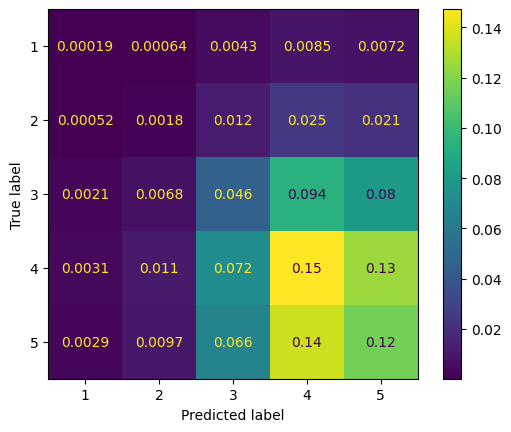

In [ ]:
cm = confusion_matrix(test_y, predictions, labels=classifier.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
precision_score(test_y, predictions, average='micro')

0.31117982491366153